<a href="https://colab.research.google.com/github/UniVR-DH/ADHLab/blob/main/lecture04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing Document Relevance with TF-IDF & BM25


<img src="https://drive.google.com/uc?export=view&id=1m_EMdnI5C826kgqK7r5vB4TXnB0-Wq7W" alt="Intestazione con loghi istituzionali" width="525"/>

| Docente      | Insegnamento | Anno Accademico    |
| :---        |    :----   |          ---: |
| Matteo Lissandrini      | Laboratorio Avanzato di Informatica Umanistica       | 2023/2024   |

## Usual install and basic imports

In [1]:
%pip install wikipedia-api
%pip install rank_bm25

In [2]:
import gzip
import math
import string
import requests
import numpy as np
import regex as re
import matplotlib.pyplot as plt
from collections import Counter

In [7]:
punct_regex = re.compile('[{}]'.format(re.escape(string.punctuation))) # Regex matching any punctuation
space_regex = re.compile(' +') # Regex matching whitespace

## Goal:  build a search engine on chapters of Alice in Wonderland and Aesop's Fables



In [34]:
inverted_index = {}
    # In this index we use a key the keyword
    # and as value a dictionary for  (document, page) to save word frequency


page_statistics = {}
    # in this dictionary we save data about each page, key is the (document, page)
    # and data will be length as number of words



In [20]:
def get_pages(book_text):
  """
  Function that given  the book text returns a list of pages
  """
  _pages = book_text.split("\n\r\n\r\n\r")
  _pages = [ space_regex.sub(' ', page).strip() for page in _pages ]
  _pages = [ space_regex.sub(' ', " ".join(page.splitlines())) for page in _pages ]
  _pages = [ page for page in _pages if page != "" ]

  return _pages


def add_to_index(text_pages, inverted_index, page_statistics, book_name=""):
  """
  Indexing function
  This function indexes only words!
  """
  print('===')
  print("Indexing {} pages".format(len(text_pages)))

  # index page by page
  num_pages = len(text_pages)
  distinct_words = set()
  for page_number, page in enumerate(text_pages):
    page_word_list = page.split(' ')

    page_statistics[(book_name, page_number)]= len(page_word_list)

    for position, word in enumerate(page_word_list):
        index_entry = inverted_index.setdefault(word, {})
        distinct_words.add(word)
        word_frequency = index_entry.get((book_name, page_number), 0)
        index_entry[(book_name, page_number)] = word_frequency + 1

  print('Indexed {} words over {} pages'.format(len(distinct_words), num_pages))




In [21]:
# request the raw text of Alice in Wonderland
r = requests.get(r'https://ia801604.us.archive.org/6/items/alicesadventures19033gut/19033.txt')
alice = r.text

alice_pages = get_pages(alice)


add_to_index(alice_pages, inverted_index, page_statistics, "Alice")

r = requests.get(r'https://ia600906.us.archive.org/29/items/aesopsfablesanew11339gut/11339.txt')
fables = r.text

fables_pages = get_pages(fables)
add_to_index(fables_pages, inverted_index, page_statistics, "Fables")


===
Indexing 19 pages
Indexed 3410 words over 19 pages
===
Indexing 294 pages
Indexed 8164 words over 294 pages


In [26]:
print(inverted_index["Alice"])
print(inverted_index["white"])
print(inverted_index["rose"])
print(inverted_index["fox"])

{('Alice', 0): 4, ('Alice', 2): 2, ('Alice', 7): 28, ('Alice', 8): 16, ('Alice', 9): 20, ('Alice', 10): 24, ('Alice', 11): 22, ('Alice', 12): 20, ('Alice', 13): 16, ('Alice', 14): 34, ('Alice', 15): 6, ('Alice', 16): 8, ('Alice', 17): 2}
{('Alice', 8): 6, ('Alice', 10): 4, ('Alice', 14): 2, ('Fables', 3): 4, ('Fables', 76): 4, ('Fables', 154): 2}
{('Alice', 16): 2, ('Fables', 26): 2, ('Fables', 219): 2}
{('Fables', 3): 8, ('Fables', 89): 2, ('Fables', 97): 2, ('Fables', 123): 2}


**TF-IDF  Formula**
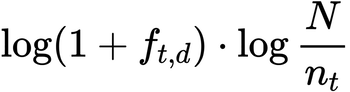

In [33]:
# TODO: what is the TF-IDF relevance for each query/page?

## Using BM25

In [32]:
from rank_bm25 import BM25Okapi


bm25_alice = BM25Okapi([_page.split(" ") for _page in alice_pages])

query = "white rabbit"
tokenized_query = query.split(" ")

doc_scores = bm25_alice.get_scores(tokenized_query)
print([ (id, score) for id, score in  enumerate(doc_scores) if score > 0 ])

bm25_alice.get_top_n(tokenized_query, alice_pages, n=1)

[(7, 1.7325403378321267), (8, 2.1968624956863216), (10, 1.6792970436782613), (14, 1.1847792904574401)]


['II--THE POOL OF TEARS "Curiouser and curiouser!" cried Alice (she was so much surprised that for the moment she quite forgot how to speak good English). "Now I\'m opening out like the largest telescope that ever was! Good-by, feet! Oh, my poor little feet, I wonder who will put on your shoes and stockings for you now, dears? I shall be a great deal too far off to trouble myself about you." Just at this moment her head struck against the roof of the hall; in fact, she was now rather more than nine feet high, and she at once took up the little golden key and hurried off to the garden door. Poor Alice! It was as much as she could do, lying down on one side, to look through into the garden with one eye; but to get through was more hopeless than ever. She sat down and began to cry again. She went on shedding gallons of tears, until there was a large pool all \'round her and reaching half down the hall. After a time, she heard a little pattering of feet in the distance and she hastily drie